# Pytorch GAN

In [1]:
import torch
import torch.optim as opt
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
batch_size = 64
transform = transforms.ToTensor()
traindata = torchvision.datasets.MNIST('./data/', download=True, transform=transform, train = True)
trainloader = torch.utils.data.DataLoader(traindata, shuffle=True, batch_size=mb_size)

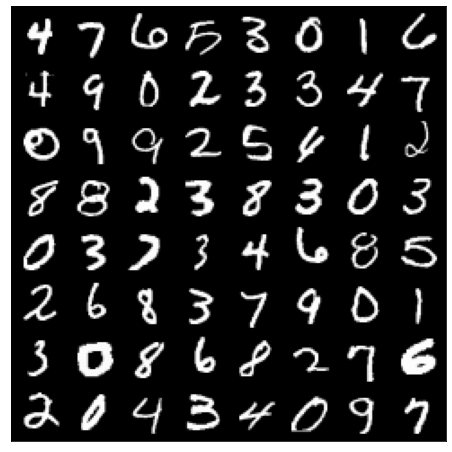

torch.Size([64, 1, 28, 28])


In [5]:
dataiter = iter(trainloader)
imgs, labels = dataiter.next()

def imshow(img):
    """ Visualizing images """
    img = torchvision.utils.make_grid(img)
    img2np = img.numpy()
    plt.figure(figsize=(8,8))
    plt.imshow(np.transpose(img2np, (1,2,0)), cmap='Greys_r')
    plt.xticks([])
    plt.yticks([])
    plt.show()

imshow(imgs)

print(imgs.size())

In [6]:
def xavier_init(m):
    """ Xavier initialization """
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0)

In [8]:
# Defining the Genrator 

class Gen(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 128),
            nn.ReLU(),
            nn.Linear(128, 784),
            nn.Sigmoid()
        )
        self.model.apply(xavier_init)
    
    def forward(self, input):
        return self.model(input)
    
test = Gen()
print(test)

Gen(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=784, bias=True)
    (3): Sigmoid()
  )
)


In [9]:
# Defining the Discriminator

class Dis(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )
        self.model.apply(xavier_init)
    
    def forward(self, input):
        return self.model(input)
    
test = Dis()
print(test)

Dis(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=1, bias=True)
    (3): Sigmoid()
  )
)


In [10]:
# Instantiating the networks
G = Gen()
D = Dis()

In [11]:
G_solver = opt.Adam(G.parameters(), lr = 1e-3)
D_solver = opt.Adam(D.parameters(), lr = 1e-3)

Epoch:0,   G_loss:6.092499180389112,   D_loss:0.061059360349449567


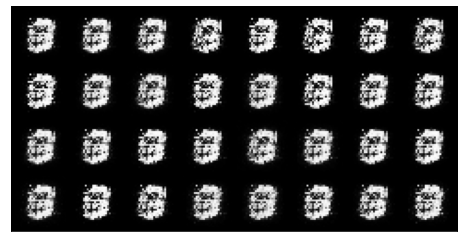

Epoch:1,   G_loss:6.170936953538517,   D_loss:0.04086523429045815


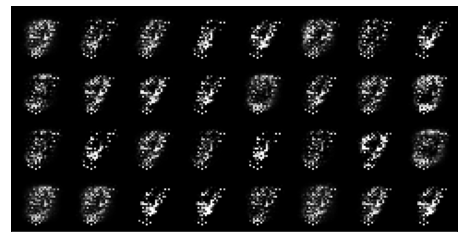

Epoch:2,   G_loss:5.199416998861187,   D_loss:0.07261137403289615


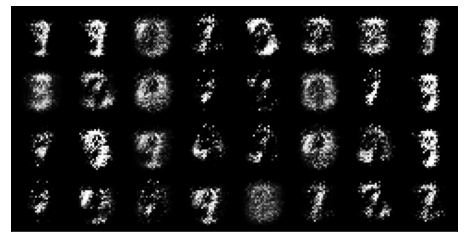

Epoch:3,   G_loss:5.2485182936003465,   D_loss:0.13397848940710586


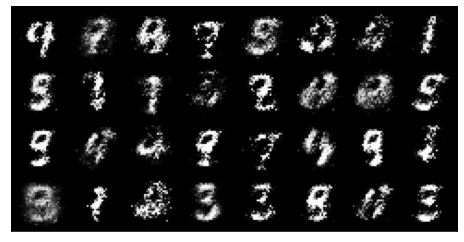

Epoch:4,   G_loss:5.0267274613573605,   D_loss:0.21657925507605774


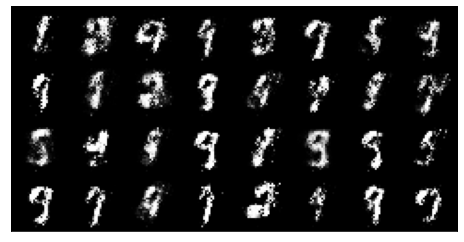

In [13]:
# Defining the training for loop
for epoch in range(5):
    G_loss_run = 0.0
    D_loss_run = 0.0
    for i,data in enumerate(trainloader):
        X, _ = data
        X = X.view(X.size(0), -1)
        batch_size = X.size(0)
        
        # Definig labels for real (1s) and fake (0s) images
        one_labels = torch.ones(batch_size, 1)
        zero_labels = torch.zeros(batch_size, 1)
        
        # Random normal distribution for each image
        z = torch.randn(batch_size, 100)
        
        
        # Feed forward in discriminator both 
        # fake and real images
        D_real = D(X)
        # fakes = G(z)
        D_fake = D(G(z))
        
        # Defining the loss for Discriminator
        D_real_loss = F.binary_cross_entropy(D_real, one_labels)
        D_fake_loss = F.binary_cross_entropy(D_fake, zero_labels)
        D_loss = D_fake_loss + D_real_loss
        
        # backward propagation for discriminator
        D_solver.zero_grad()
        D_loss.backward()
        D_solver.step()
        
        # Feed forward for generator
        z = torch.randn(batch_size, 100)
        D_fake = D(G(z))
        
        # loss function of generator
        G_loss = F.binary_cross_entropy(D_fake, one_labels)
        
        # backward propagation for generator
        G_solver.zero_grad()
        G_loss.backward()
        G_solver.step()
        
        G_loss_run += G_loss.item()
        D_loss_run += D_loss.item()
        
    # printing loss after each epoch 
    print('Epoch:{},   G_loss:{},   D_loss:{}'.format(epoch, G_loss_run/(i+1), D_loss_run/(i+1) ))
    
    # Plotting fake images generated after each epoch by generator
    samples = G(z).detach()
    samples = samples.view(samples.size(0), 1, 28, 28)
    imshow(samples)